# Evaluation Metrics

🚨 A single metric will only tell one side of the story. Ensure you investigate a model's effectiveness from multiple angles 🚨

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv('https://wagon-public-datasets.s3.amazonaws.com/insurance_ML3.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges,price_range
0,19,female,27.900,0,True,southwest,16884.92400,expensive
1,18,male,33.770,1,False,southeast,1725.55230,cheap
2,28,male,33.000,3,False,southeast,4449.46200,cheap
3,33,male,22.705,0,False,northwest,21984.47061,expensive
4,32,male,28.880,0,False,northwest,3866.85520,cheap


In [3]:
X = df[['age','bmi','children','smoker']]
y = df['charges']


X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3, 
                                                    random_state = 6) # Holdout


X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)

## Regression Metrics

In [4]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, max_error, r2_score
import math


In [6]:
model = LinearRegression()
y_pred = model.fit(X_train, y_train).predict(X_test)

### Mean Squared Error

- Useful to penalize large errors
- No sense of direction
- Not expressed in the same units as the target
- Very sensitive to outliers

👉 Use MSE when you need to penalize large errors more strictly than small ones.


- Larger errors have a disproportionally bigger impact, hence should be more penalized
     - Example: clinical trials, where an error of 4mg can be more than twice as bad as an error of 2mg

In [7]:
mse = mean_squared_error(y_test, y_pred)
print('MSE =', round(mse, 2))

MSE = 33586296.45


**Good to compare model vs model, but no real world explainability**

### Root Mean Squared Error

- Still Uses MSE error calculation to penalize large errors

👉 Use RMSE when you want the MSE to be represented in the unit of the target, making it more interpretable

In [8]:
rmse = math.sqrt(mse)
print('RMSE =', round(rmse, 2))

RMSE = 5795.37


**Large errors still penalized more, but can now be discussed in dollar terms with errors of ~$5.5K vs. ~13K average policy charge**

### Mean Absolute Error

- Less sensitive to outliers


👉 Use MAE when all errors, large or small, have equal importance and you need easily interpretable results

    - Example: weather forecast, where an error of 4 degrees is simply twice as bad as an error of 2 degrees

In [9]:
mae = mean_absolute_error(y_test, y_pred)
print('MAE =', round(mae, 2))

MAE = 4008.35


**Model predicts with an average error of $4K**

### Max Error

- Largest error made when prediciting

👉 Use Max Error when you want to limit the magnitude of the errors.

    - Example: temperature management for a piece of equipment that can overheat maximum 2 degrees

In [10]:
max_error = max_error(y_test, y_pred)
print('Max Error =', round(max_error, 2))

Max Error = 22561.41


**The Worst prediction we made was $23K away from the actual charges**

### R2

👉 Use 
R
2
 when:

- The unit of the error is not important
- You want to compare between different datasets

In [11]:
rsquared = r2_score(y_test, y_pred)
print('R2 =', round(rsquared, 2))

R2 = 0.79


**The model explains 79% of the variance within the target**

## Classifictation Metrics

In [13]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

y_true = [0, 1, 0, 0, 1, 0, 1, 1, 0, 1]
y_pred = [0, 0, 0, 0, 1, 1, 1, 1, 1, 1]

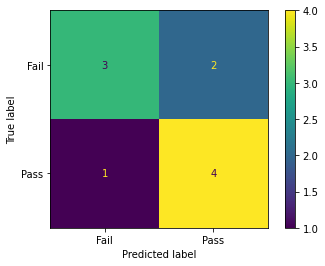

In [14]:
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_true, y_pred),
                              display_labels=['Fail','Pass']).plot();


### Accuracy

Sum of the correct predictions (True Positive + True Negative) divided by the sum of the overall number of predictions

🚨 Using accuracy alone can give overly confident scores, especially when dealing with imbalanced datasets 🚨

👉 Use accuracy when:

-  Target classes are balanced
-  Prediction of each class is equally important

In [15]:
print('Accuracy =', round(accuracy_score(y_true, y_pred), 2)) 

Accuracy = 0.7


**70% of the time, the model predicts the students outcome correctly**

### Recall

Measures the ability of the model to detect occurrences of a class.  True Positives Predicted / Total number of Positives (TP / (TP + FN))

🚨 We could get too many false alarms, if everything is predicted as positive you will have 100% recall 🚨

👉 Use recall when:

- It is important to identify as many occurrences of a class as possible, reducing false negatives but potentially increasing false positives

- You don't want to miss any positive classes

     - Example: Detecting fraudulent transactions, cases of a novel disease or potential sales leads

In [16]:
print('Recall =', round(recall_score(y_true, y_pred), 2)) 

Recall = 0.8


**We successfully identify 80% of students who will pass**

### Precision

Measures the ability of a model to avoid false alarms for a class, or the confidence of a model when predicting a specific class.  True Positive Predictions / All Positive Predictions (TP / (TP + FP))

🚨 We could be missing many Positives, False negatives are ignored in calculation 🚨

👉 Use precision when:

 - It is important to be correct when identifying a class, reducing false positives but potentially increasing false negatives

    - Example: Targeted advertising, food and drug safety (you'd like the model to be really confident when classifying a drug as safe)

In [17]:
print('Precision =', round(precision_score(y_true, y_pred), 2)) 

Precision = 0.67


**If the model predicts you to pass, it is correct 67% of the time**

### F1

A combination of precision and recall into a single metric. (2 * ((Precision * recall) / (precision + recall)))

🚨 It will be influenced more by the lower of the two values 🚨

👉 Use F1 score when you want:

- A general metric to compare across models and datasets
- Combine the Precision/Recall tradeoff in a single metric

In [18]:
print('F1 score =', round(f1_score(y_true, y_pred), 2))

F1 score = 0.73


**Useful when comparing against other problem sets or evaluating performance as a whole, but lose easy explainability**